In [139]:
import pandas as pd
import seaborn as sns

Read the Excel file

In [18]:
df = pd.read_excel(r"C:/Users/me/Downloads/FACS cells timecourse.xls").fillna('')

Get the unique entries of your data

In [30]:
cur_item = 0
cur_depth = 0

entry_ids = [0]

for i, row in df.iterrows():

    ######
    ## Know we know all your secrets
    if row['Depth'].count('>') > cur_depth:
        print(">", row['Depth'].count('>'))
        cur_depth += 1
        
    elif row['Depth'].count('>') == cur_depth:
        pass
        
    else:
        entry_ids.append(i)
        cur_item += 1
        cur_depth = row['Depth'].count('>')
        print(row['Name'])
        

        

> 1
> 2
> 3
> 4
X knockout_8h treated_020.fcs
> 1
> 2
> 3
> 4
X knockout_8h control unstained_017.fcs
> 1
> 2
> 3
> 4
X knockout_8h control 001_018.fcs
> 1
> 2
> 3
> 4
X knockout_16h treated unstained_023.fcs
> 1
> 2
> 3
> 4
X knockout_16h treated_024.fcs
> 1
> 2
> 3
> 4
X knockout_16h control unstained_021.fcs
> 1
> 2
> 3
> 4
X knockout_16h control_022.fcs
> 1
> 2
> 3
> 4
X knockout_20h treated unstained_027.fcs
> 1
> 2
> 3
> 4
X knockout_20h treated_028.fcs
> 1
> 2
> 3
> 4
X knockout_20h control unstained_025.fcs
> 1
> 2
> 3
> 4
X knockout_20h control_026.fcs
> 1
> 2
> 3
> 4
X knockout_24h treated unstained_031.fcs
> 1
> 2
> 3
> 4
X knockout_24h treated_032.fcs
> 1
> 2
> 3
> 4
X knockout_24h treated_032.fcs/Cells/Single Cells/low HSP70
X knockout_24h control unstained_029.fcs
> 1
> 2
> 3
> 4
X knockout_24h control_030.fcs
> 1
> 2
> 3
> 4
X wt_8h treated unstained_003.fcs
> 1
> 2
> 3
> 4
X wt_8h treated_004.fcs
> 1
> 2
> 3
> 4
X wt_8h control unstained_001.fcs
> 1
> 2
> 3
> 4
X wt_8h 

We write a function to extract the meta data

In [129]:
def getMetadata(s):
    
    meta = []
    
    # Separate all meta information from each other
    for i in s.split(" "):
        meta.extend(i.split("_"))
        
    # Convert time to an integer
    meta[2] = int(meta[2][:-1])

    # Unstained events are not indicate, indicate them!
    if meta[4] != "unstained":
        meta.insert(4, "stained")
        
    # Solve double IDs --> remove additional 001
    if meta[5] == "001":
        if meta[6] != None:
            meta.pop(5)
            
    # Solve special case for multiple gates
    if len(meta) > 6:
        # State additional gate at beginning
        meta[0] = meta[-1]
        
        # Processing and cleaning
        meta.pop(6)
        meta.pop(6)
        meta[-1] = meta[-1].split("/")[0]
        
    # Remove file ending
    meta[-1] = meta[-1].replace(".fcs", "")
        
    return meta

getMetadata("X knockout_8h treated unstained_019.fcs")

['X', 'knockout', 8, 'treated', 'unstained', '019']

Compile the metadata together

In [130]:
to_df = []

for i in entry_ids:
    meta = getMetadata(df.loc[i]['Name'])
    
    to_df.append([i] + meta)

Create the **overview**

In [131]:
overview = pd.DataFrame(to_df)
overview.columns = "EntryId", "Gate", "Type", "t", "Treatment", "Stained", "Id"
overview

,EntryId,Gate,Type,t,Treatment,Stained,Id
0,0,X,knockout,8,treated,unstained,019
1,8,X,knockout,8,treated,stained,020
2,16,X,knockout,8,control,unstained,017
3,24,X,knockout,8,control,stained,018
4,32,X,knockout,16,treated,unstained,023
5,40,X,knockout,16,treated,stained,024
6,48,X,knockout,16,control,unstained,021
7,56,X,knockout,16,control,stained,022
8,64,X,knockout,20,treated,unstained,027
9,72,X,knockout,20,treated,stained,028


# Get the mean and median values

In [132]:
means = []

for i, row in overview.iterrows():
#     print(i, row['EntryId'])
    # I AM LOOKING AT EACH ENTRY
    
    # GIVE ME IN THE ORIGINAL DATASET THE NEXT COUPLE OF ENTRIES (~ 10)
    for j, row2 in df.loc[row['EntryId']:row['EntryId']+10].iterrows():
        # IF we found the Mean, get the desired number
        if "Mean" in row2['Name']:
            means.append(row2['Statistic'])
            # Let's stop here, because we found what we needed
            break
            
overview['mean'] = means

medians = []

for i, row in overview.iterrows():
#     print(i, row['EntryId'])
    # I AM LOOKING AT EACH ENTRY
    
    # GIVE ME IN THE ORIGINAL DATASET THE NEXT COUPLE OF ENTRIES (~ 10)
    for j, row2 in df.loc[row['EntryId']:row['EntryId']+10].iterrows():
        # IF we found the Mean, get the desired number
        if "Median" in row2['Name']:
            medians.append(row2['Statistic'])
            # Let's stop here, because we found what we needed
            break
            
overview['median'] = medians

Select the control and the treated group

In [133]:
ov = overview.query("(Stained == 'stained') & Gate != 'HSP70'")
control = ov.sort_values(["Type", "t", "Treatment"]).query("Treatment!='treated'")
treated = ov.sort_values(["Type", "t", "Treatment"]).query("Treatment=='treated'")

Only check for the right columns

In [134]:
final = control[list(control.columns[:4])+list(control.columns[5:])].reset_index()

Compute the **ratio**

In [135]:
final['ratio'] = treated['mean'].values/control['mean'].values

In [137]:
final

,index,EntryId,Gate,Type,t,Stained,Id,mean,median,ratio
0,3,24,X,knockout,8,stained,018,1807.0,1668.0,1.023243
1,7,56,X,knockout,16,stained,022,870.0,786.0,2.003448
2,11,88,X,knockout,20,stained,026,1188.0,1112.0,1.535354
3,16,121,X,knockout,24,stained,030,1137.0,1041.0,1.563764
4,20,153,X,wt,8,stained,002,1100.0,989.0,1.539091
5,24,185,X,wt,16,stained,006,1075.0,1008.0,0.973953
6,29,218,X,wt,20,stained,010,879.0,793.0,1.385666
7,33,250,X,wt,24,stained,014,823.0,745.0,1.251519


Plot the data

<AxesSubplot:xlabel='t', ylabel='ratio'>

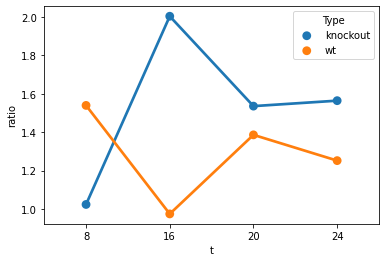

In [138]:
sns.pointplot(x='t', y='ratio', hue='Type', data=final)